<a href="https://colab.research.google.com/github/simonamador/EEG-Channel-Selection-Algorithm/blob/main/SequentialSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
channels = np.array(['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 
            'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3',
            'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 
            'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3',
            'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 
            'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5',
            'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8','PO7',
            'PO3','POz','PO4','PO8','O1','Oz','O2','Iz'])


In [ ]:
rows1 = []
rows2 = []
rows3 = []
rows4 = []
rows5 = []
rows6 = []

for s in range(106):
#Se extraen archivos de data preprocesada de EEG
  with np.load('/content/drive/MyDrive/Colab Notebooks/Dusthon/CNN3/Subject'+str(s+1)+'.npz', allow_pickle=True) as data:
    D = data['D']
    Mi = data['Mi']
    NrAcc = data['NrAcc']
  del data #Se elimina para que no ocupe RAM
  
  S1 = {'Subject': s+1,
      '1st Channel': channels[Mi[0][9]], '1st Accuracy': D[0][9], 
      '2nd Channel': channels[Mi[0][8]], '2nd Accuracy': D[0][8], 
      '3rd Channel': channels[Mi[0][7]], '3rd Accuracy': D[0][7], 
      '4th Channel': channels[Mi[0][6]], '4th Accuracy': D[0][6], 
      '5th Channel': channels[Mi[0][5]], '5th Accuracy': D[0][5], 
      '6th Channel': channels[Mi[0][4]], '6th Accuracy': D[0][4], 
      '7th Channel': channels[Mi[0][3]], '7th Accuracy': D[0][3], 
      '8th Channel': channels[Mi[0][2]], '8th Accuracy': D[0][2],
      '9th Channel': channels[Mi[0][1]], '9th Accuracy': D[0][1], 
      '10th Channel': channels[Mi[0][0]], '10th Accuracy': D[0][0]}

  S2 = {'Subject': s+1,
      '1st Channel': channels[Mi[1][4]], '1st Accuracy': D[1][4], 
      '2nd Channel': channels[Mi[1][3]], '2nd Accuracy': D[1][3], 
      '3rd Channel': channels[Mi[1][2]], '3rd Accuracy': D[1][2],
      '4th Channel': channels[Mi[1][1]], '4th Accuracy': D[1][1], 
      '5th Channel': channels[Mi[1][0]], '5th Accuracy': D[1][0]}
  
  S3 = {'Subject': s+1,
      '1st Channel': channels[Mi[2][4]], '1st Accuracy': D[2][4], 
      '2nd Channel': channels[Mi[2][3]], '2nd Accuracy': D[2][3], 
      '3rd Channel': channels[Mi[2][2]], '3rd Accuracy': D[2][2],
      '4th Channel': channels[Mi[2][1]], '4th Accuracy': D[2][1], 
      '5th Channel': channels[Mi[2][0]], '5th Accuracy': D[2][0]}

  S4 = {'Subject': s+1,
        '1st Channel': channels[Mi[3][4]], '1st Accuracy': D[3][4], 
        '2nd Channel': channels[Mi[3][3]], '2nd Accuracy': D[3][3], 
        '3rd Channel': channels[Mi[3][2]], '3rd Accuracy': D[3][2],
        '4th Channel': channels[Mi[3][1]], '4th Accuracy': D[3][1], 
        '5th Channel': channels[Mi[3][0]], '5th Accuracy': D[3][0]}

  S5 = {'Subject': s+1,
        '1st Channel': channels[Mi[4][4]], '1st Accuracy': D[4][4], 
        '2nd Channel': channels[Mi[4][3]], '2nd Accuracy': D[4][3], 
        '3rd Channel': channels[Mi[4][2]], '3rd Accuracy': D[4][2],
        '4th Channel': channels[Mi[4][1]], '4th Accuracy': D[4][1], 
        '5th Channel': channels[Mi[4][0]], '5th Accuracy': D[4][0]}

  S6 = {'Subject': s+1,
        '1st Channel': channels[Mi[5][4]], '1st Accuracy': D[5][4], 
        '2nd Channel': channels[Mi[5][3]], '2nd Accuracy': D[5][3], 
        '3rd Channel': channels[Mi[5][2]], '3rd Accuracy': D[5][2],
        '4th Channel': channels[Mi[5][1]], '4th Accuracy': D[5][1], 
        '5th Channel': channels[Mi[5][0]], '5th Accuracy': D[5][0]}
  
  rows1.append(S1)
  rows2.append(S2)
  rows3.append(S3)
  rows4.append(S4)
  rows5.append(S5)
  rows6.append(S6)

one_channel = pd.DataFrame(rows1)
two_channel = pd.DataFrame(rows2)
three_channel = pd.DataFrame(rows3)
four_channel = pd.DataFrame(rows4)
five_channel = pd.DataFrame(rows5)
six_channel = pd.DataFrame(rows6)

del S1,S2,S3,S4,S5,S6,rows1,rows2,rows3,rows4,rows5,rows6,D,Mi,s

In [ ]:
def a2b(a,df,x):
    return df[df.iloc[:,x]==a].iloc[0,x+1]
def av(a,df):
  acc = []
  for i in range(10):
    if df[df.iloc[:,1+2*i]==a].size !=0:
      acc.append(a2b(a,df,1+2*i))
  return sum(acc)/len(acc)

good_ch_lst = [
    one_channel['1st Channel'],
    one_channel['2nd Channel'],
    one_channel['3rd Channel'],
    one_channel['4th Channel'],
    one_channel['5th Channel'],
    one_channel['6th Channel'],
    one_channel['7th Channel'],
    one_channel['8th Channel'],
    one_channel['9th Channel'],
    one_channel['10th Channel']]

good_ch = pd.DataFrame(pd.concat(good_ch_lst).value_counts()).reset_index(
          ).rename(columns={'index':'Channel',0:'Instances'})

accuracies = [str(round(av(a[1],one_channel)*100,2))+' %' for a in good_ch['Channel'].iteritems()]

good_ch['Percentage'] = [str(round(i[1]/1060*100,2))+'%' for i in good_ch['Instances'].iteritems()]
good_ch['Mean Precission'] = accuracies
good_ch.sort_values(['Percentage','Mean Precission'], ascending = False).head(10).style.hide_index()

<ipython-input-49-211ed91532a4>:25: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  accuracies = [str(round(av(a[1],one_channel)*100,2))+' %' for a in good_ch['Channel'].iteritems()]
<ipython-input-49-211ed91532a4>:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  good_ch['Percentage'] = [str(round(i[1]/1060*100,2))+'%' for i in good_ch['Instances'].iteritems()]
<ipython-input-49-211ed91532a4>:29: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  good_ch.sort_values(['Percentage','Mean Precission'], ascending = False).head(10).style.hide_index()


Channel,Instances,Percentage,Mean Precission
FC5,37,3.49%,77.78 %
FCz,34,3.21%,79.37 %
FC1,29,2.74%,83.33 %
FC6,29,2.74%,66.67 %
FC4,28,2.64%,68.25 %
C3,26,2.45%,74.07 %
C5,26,2.45%,71.43 %
FC3,25,2.36%,74.07 %
FC2,24,2.26%,73.02 %
C6,24,2.26%,71.11 %


In [ ]:
def mult_ac(l,df,x):
  return df[l].iloc[0,x+1]

def mult_av(a,df):
  acc = []
  for i in range(5):
    l = []
    for s in range(106):
      l.append(" ".join(df.iloc[s,1+2*i])==" ".join(a))
    if df[l].size !=0:
      acc.append(mult_ac(l,df,1+2*i))
  return sum(acc)/len(acc)

def value_counts(df):
  for column_name, item in df.iteritems():
    df.iteritems
  return 0

good_ch3_lst = [
    three_channel['1st Channel'],
    three_channel['2nd Channel'],
    three_channel['3rd Channel'],
    three_channel['4th Channel'],
    three_channel['5th Channel']]

good_ch3 = pd.DataFrame(pd.concat(good_ch3_lst).value_counts()).reset_index(
          ).rename(columns={'index':'Channel Set',0:'Instances'})
new = pd.DataFrame(good_ch3['Channel Set'].tolist(), columns = ['Ch1','Ch2','Ch3'])
new['Channels'] = new['Ch1']+', '+new['Ch2']+', '+new['Ch3']
new = pd.DataFrame(new.value_counts('Channels')).reset_index().rename(columns=
          {'Channels':'Channel Set', 0: 'Instances'})
accuracies3 = [str(round(mult_av(np.array(a[1].split(', '),dtype='<U3'),three_channel)*100,2))+' %' for a in new['Channel Set'].iteritems()]
new['Percentage'] = [str(round(i[1]/1060*100,2))+'%' for i in new['Instances'].iteritems()]
new['Mean Precission'] = accuracies3
new.sort_values(['Percentage','Mean Precission'], ascending = False).head(10).style.hide_index()


<ipython-input-16-609e60ebcaa0>:35: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  new.sort_values(['Percentage','Mean Precission'], ascending = False).head(10).style.hide_index()


Channel Set,Instances,Percentage,Mean Precission
"FC5, C3, AF4",2,0.19%,77.78 %
"PO3, CP1, P1",2,0.19%,66.67 %
"P6, PO4, CP6",2,0.19%,50.0 %
"FT7, O1, F3",1,0.09%,88.89 %
"FC5, FT7, FC1",1,0.09%,88.89 %
"FC5, FC6, T7",1,0.09%,88.89 %
"FC5, FC6, C5",1,0.09%,88.89 %
"FC5, F8, FC6",1,0.09%,88.89 %
"FC6, PO8, P1",1,0.09%,88.89 %
"FC6, PO4, O2",1,0.09%,88.89 %


In [ ]:
good_ch6_lst = [
    six_channel['1st Channel'],
    six_channel['2nd Channel'],
    six_channel['3rd Channel'],
    six_channel['4th Channel'],
    six_channel['5th Channel']]

good_ch6 = pd.DataFrame(pd.concat(good_ch6_lst).value_counts()).reset_index(
          ).rename(columns={'index':'Channel Set',0:'Instances'})
new6 = pd.DataFrame(good_ch6['Channel Set'].tolist(), columns = ['Ch1','Ch2','Ch3','Ch4','Ch5','Ch6'])
new6['Channels'] = new6['Ch1']+', '+new6['Ch2']+', '+new6['Ch3']+', '+new6['Ch4']+', '+new6['Ch5']+', '+new6['Ch6']
new6 = pd.DataFrame(new6.value_counts('Channels')).reset_index().rename(columns=
          {'Channels':'Channel Set', 0: 'Instances'})
accuracies6 = [str(round(mult_av(np.array(a[1].split(', '),dtype='<U3'),six_channel)*100,2))+' %' for a in new6['Channel Set'].iteritems()]
new6['Percentage'] = [str(round(i[1]/1060*100,2))+'%' for i in new6['Instances'].iteritems()]
new6['Mean Precission'] = accuracies6
new6.sort_values(['Percentage','Mean Precission'], ascending = False).head(10).style.hide_index()

<ipython-input-17-249fdd599f07>:17: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  new6.sort_values(['Percentage','Mean Precission'], ascending = False).head(10).style.hide_index()


Channel Set,Instances,Percentage,Mean Precission
"T8, CP2, C2, FC4, C6, P4",1,0.09%,77.78 %
"FC1, CP1, C4, FC2, C1, CP2",1,0.09%,77.78 %
"FC1, CP1, C4, CPz, FC2, CP2",1,0.09%,77.78 %
"FT7, Iz, O1, Pz, POz, F5",1,0.09%,66.67 %
"FT7, O1, F5, POz, F3, Pz",1,0.09%,66.67 %
"FT7, Iz, O1, Pz, POz, AF3",1,0.09%,66.67 %
"T8, CP2, C2, FCz, FC1, FC2",1,0.09%,66.67 %
"T8, CP2, C2, FCz, C6, FC2",1,0.09%,66.67 %
"T8, CP2, C2, FC4, FC1, P4",1,0.09%,66.67 %
"T8, CP2, C2, FC4, FC1, FCz",1,0.09%,66.67 %


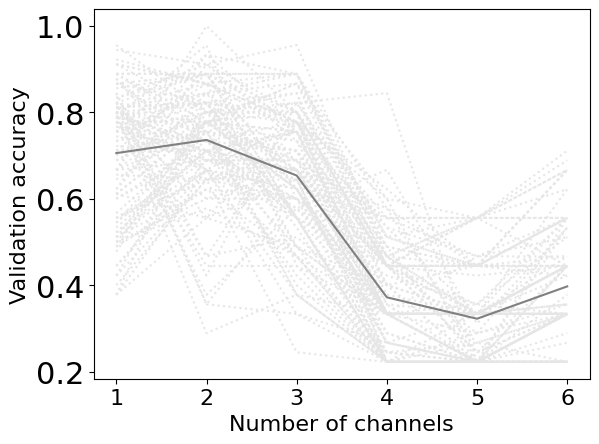

In [ ]:
acc1 = pd.concat([
    one_channel['1st Accuracy'],
    one_channel['2nd Accuracy'],
    one_channel['3rd Accuracy'],
    one_channel['4th Accuracy'],
    one_channel['5th Accuracy'],
    one_channel['6th Accuracy'],
    one_channel['7th Accuracy'],
    one_channel['8th Accuracy'],
    one_channel['9th Accuracy'],
    one_channel['10th Accuracy']])

acc2 = pd.concat([
    two_channel['1st Accuracy'],
    two_channel['2nd Accuracy'],
    two_channel['3rd Accuracy'],
    two_channel['4th Accuracy'],
    two_channel['5th Accuracy']])

acc3 = pd.concat([
    three_channel['1st Accuracy'],
    three_channel['2nd Accuracy'],
    three_channel['3rd Accuracy'],
    three_channel['4th Accuracy'],
    three_channel['5th Accuracy']])

acc4 = pd.concat([
    four_channel['1st Accuracy'],
    four_channel['2nd Accuracy'],
    four_channel['3rd Accuracy'],
    four_channel['4th Accuracy'],
    four_channel['5th Accuracy']])

acc5 = pd.concat([
    five_channel['1st Accuracy'],
    five_channel['2nd Accuracy'],
    five_channel['3rd Accuracy'],
    five_channel['4th Accuracy'],
    five_channel['5th Accuracy']])

acc6 = pd.concat([
    six_channel['1st Accuracy'],
    six_channel['2nd Accuracy'],
    six_channel['3rd Accuracy'],
    six_channel['4th Accuracy'],
    six_channel['5th Accuracy']])

plt.figure()
for s in range(106):
  sacc1 = pd.Series([
    one_channel['1st Accuracy'][s],
    one_channel['2nd Accuracy'][s],
    one_channel['3rd Accuracy'][s],
    one_channel['4th Accuracy'][s],
    one_channel['5th Accuracy'][s],
    one_channel['6th Accuracy'][s],
    one_channel['7th Accuracy'][s],
    one_channel['8th Accuracy'][s],
    one_channel['9th Accuracy'][s],
    one_channel['10th Accuracy'][s]])

  sacc2 = pd.Series([
      two_channel['1st Accuracy'][s],
      two_channel['2nd Accuracy'][s],
      two_channel['3rd Accuracy'][s],
      two_channel['4th Accuracy'][s],
      two_channel['5th Accuracy'][s]])

  sacc3 = pd.Series([
      three_channel['1st Accuracy'][s],
      three_channel['2nd Accuracy'][s],
      three_channel['3rd Accuracy'][s],
      three_channel['4th Accuracy'][s],
      three_channel['5th Accuracy'][s]])

  sacc4 = pd.Series([
      four_channel['1st Accuracy'][s],
      four_channel['2nd Accuracy'][s],
      four_channel['3rd Accuracy'][s],
      four_channel['4th Accuracy'][s],
      four_channel['5th Accuracy'][s]])

  sacc5 = pd.Series([
      five_channel['1st Accuracy'][s],
      five_channel['2nd Accuracy'][s],
      five_channel['3rd Accuracy'][s],
      five_channel['4th Accuracy'][s],
      five_channel['5th Accuracy'][s]])

  sacc6 = pd.Series([
      six_channel['1st Accuracy'][s],
      six_channel['2nd Accuracy'][s],
      six_channel['3rd Accuracy'][s],
      six_channel['4th Accuracy'][s],
      six_channel['5th Accuracy'][s]])
  
  smacc = [sacc1.mean(), sacc2.mean(), sacc3.mean(), sacc4.mean(), 
          sacc5.mean(), sacc6.mean()]
  plt.plot([1,2,3,4,5,6],smacc,':',color='0.9')

meanacc = [acc1.mean(), acc2.mean(), acc3.mean(), acc4.mean(), acc5.mean(), acc6.mean()]
ch_size = [1, 2, 3, 4, 5, 6]
plt.plot(ch_size, meanacc, color='0.5')
plt.xlabel('Number of channels', fontsize = 16)
plt.ylabel('Validation accuracy', fontsize = 16)
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 

del acc1, acc2, acc3, acc4, acc5, acc6, meanacc
del sacc1, sacc2, sacc3, sacc4, sacc5, sacc6, smacc
plt.savefig('Graph1.png')

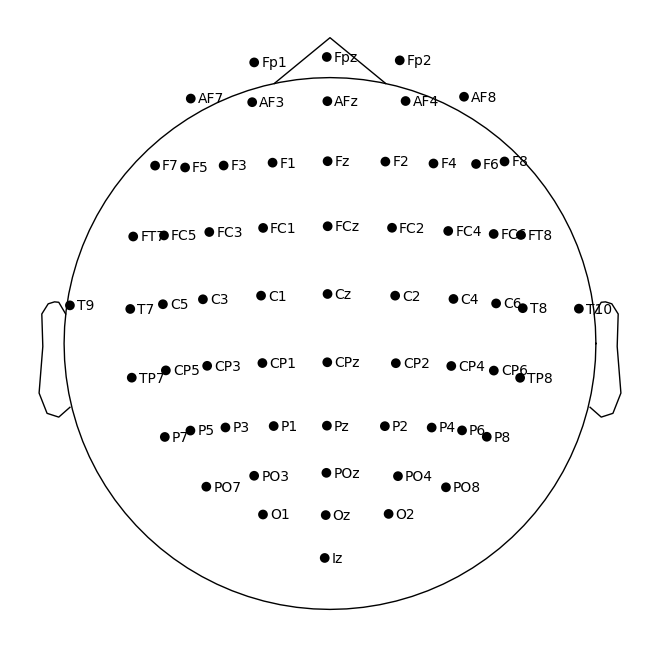

In [ ]:
#Visualizar topografia
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Choose what channels you want to keep 
# Make sure that these channels exist e.g. T1 does not exist in the standard 10-20 EEG system!
kept_channels = channels.tolist()
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
mont1020_new = mont1020.copy()
# Keep only the desired channels
mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Keep the first three rows as they are the fiducial points information
mont1020_new.dig = mont1020.dig[0:3]+kept_channel_info
mont1020_new.plot()
plt.show()

In [ ]:
info = mne.create_info(kept_channels, sfreq=256,ch_types=['eeg']*64)
info.set_montage(mont1020_new)

<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 256.0 Hz
>

In [ ]:
final = pd.concat([good_ch['Channel'].copy(),good_ch['Instances'].copy()],axis=1)
final['Nchannel'] = [kept_channels.index(a) for a in final['Channel']]
final.sort_values(['Nchannel'])
instances = final['Instances'].tolist()

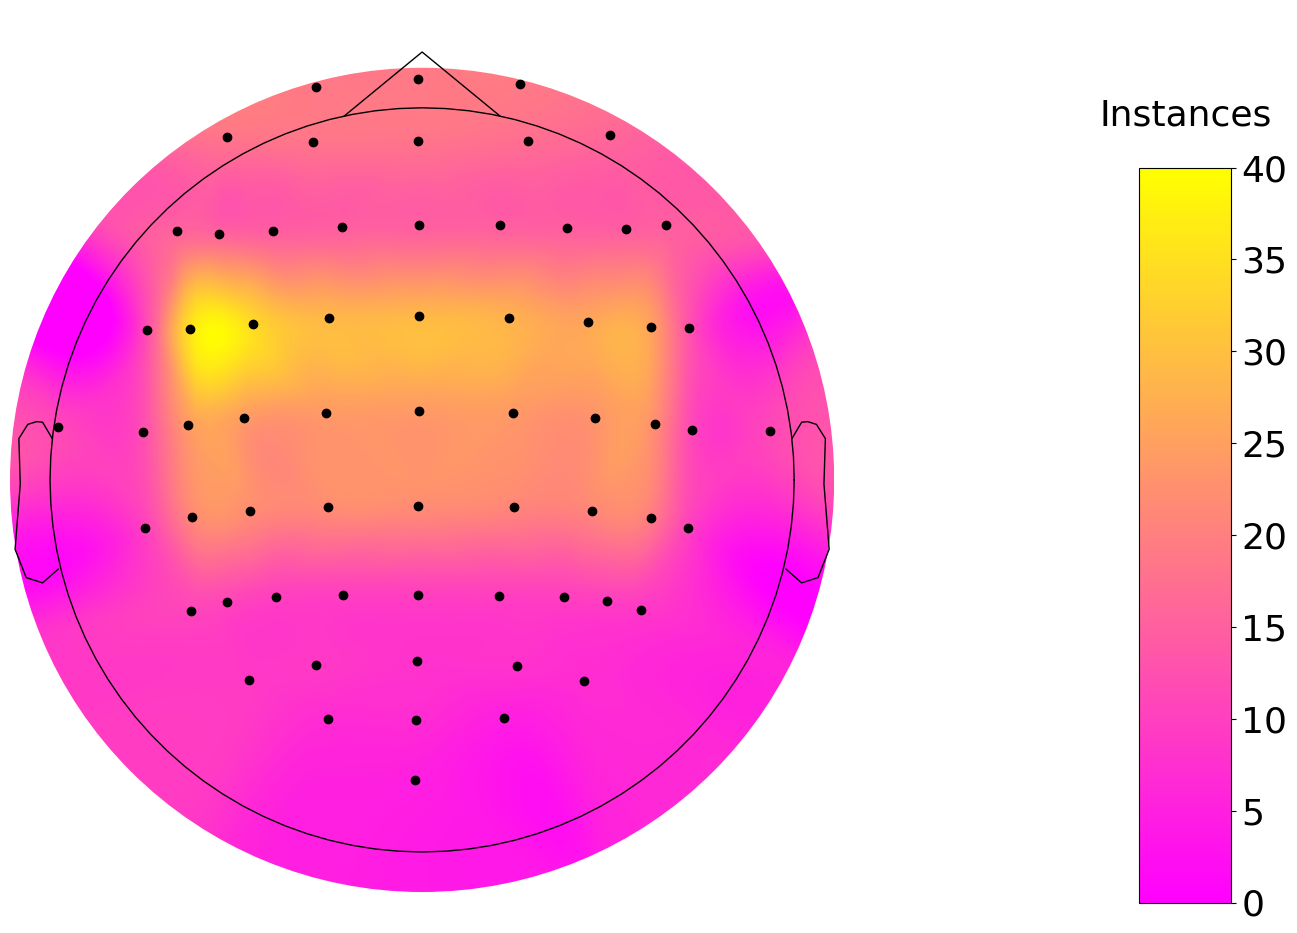

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im,cm   = mne.viz.plot_topomap(instances, info, axes = ax, contours=0, 
                               sensors = 'ok', cmap='spring', 
                               vlim = [0, 40], size=15, show=False)

# manually fiddle the position of colorbar
ax_x_start = 0.9
ax_x_width = 0.05
ax_y_start = 0.1
ax_y_height = 0.7
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title('Instances',fontsize=26, pad=30) # title on top of colorbar
clb.ax.tick_params(labelsize=26)
plt.rc('ytick', labelsize=22)
plt.savefig('topoplotCNN.jpg')